In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import math
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
pd.set_option('display.max_columns', None)
%matplotlib inline

In [ ]:
df_hikes = pd.read_csv('data/WTA_all_trail_data_clean.csv', lineterminator='\n')

In [ ]:
df_hikes.head()

In [ ]:
df_neighbors = df[['Votes','Trail','Date_type','condition|snow','condition|trail','condition|bugs','condition|road','elevation_gain','highest_point','lat','long','numReports','super_region','sub_region','total_distance']]

In [ ]:
df_neighbors

In [ ]:
df_neighbors['Date_type'] = df_neighbors['Date_type'].apply(lambda x: pd.to_datetime(x))

In [ ]:
df_neighbors['month'] = df_neighbors['Date_type'].apply(lambda x: x.month)
df_neighbors['year']= df_neighbors['Date_type'].apply(lambda x: x.year)

In [ ]:
len(df_neighbors['Trail'].unique())

In [ ]:
math.sqrt(189)

In [ ]:
k = 13

In [ ]:
lat_med = 47.7748
long_med = -123.1038

In [ ]:
df_oly =df_hikes.loc[df_hikes['sub_region'] == ' Hood Canal']

In [ ]:
df_oly

In [ ]:
df_oly.loc[df_oly['hike_name']=='Mount Rose']['lat']
list(df_oly['hike_name'].unique())

In [2]:
# Haversine formula example in Python
# Author: Wayne Dyck

import math

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [3]:
def find_hike_distances(df,trail_name):
    lat1 = df.loc[df['hike_name']== trail_name]['lat']
    lon1 = df.loc[df['hike_name']== trail_name]['long']
    origin = float(lat1),float(lon1)
    all_hikes = list(df['hike_name'].unique())
    distances = []
    for hike in all_hikes:
        lat2 = df.loc[df['hike_name']== hike]['lat']
        lon2 = df.loc[df['hike_name']== hike]['long']
        destination = float(lat2),float(lon2)
        distances.append(distance(origin,destination))
    return distances
        
    
    

In [4]:
def distance_from_median(df):
    lat2 = 47.7748
    lon2 = -123.1038
    destination = lat2,lon2
    all_hikes = list(df['hike_name'].unique())
    distances = []
    for hike in all_hikes:
        lat1 = df.loc[df['hike_name']== hike]['lat']
        lon1 = df.loc[df['hike_name']== hike]['long']
        origin = float(lat1),float(lon1)
        distances.append(distance(origin,destination))
    df['distance_from_median']= distances
    

In [ ]:

neigh = KNeighborsClassifier(n_neighbors=10)
X = df['highest_point']
X['distance_from_'] = find_hike_distances(df,trail_name)
y = df['']

In [ ]:
df_oly['test_distance'] = find_hike_distances(df_oly,'Mount Rose')

In [ ]:
df_oly

In [4]:
df_h = pd.read_csv("data/new_hood_canal_merged.csv", sep = '|',lineterminator='\n')

In [105]:
df_h

Unnamed: 0  Unnamed: 0_x  \
0               0             0   
1               1             1   
2               2             2   
3               3             3   
4               4             4   
5               5             5   
6               6             6   
7               7             7   
8               8             8   
9               9             9   
10             10            10   
11             11            11   
12             12            12   
13             13            13   
14             14            14   
15             15            15   
16             16            16   
17             17            17   
18             18            18   
19             19            19   
20             20            20   
21             21            21   
22             22            22   
23             23            23   
24             24            24   
25             25            25   
26             26            26   
27             27            27   
28             28            28   
29             29            29   
...           ...           ...   
12338       12338         12338   
12339       12339         12339   
12340       12340         12340   
12341       12341         12341   
12342       12342         12342   
12343       12343         12343   
12344       12344         12344   
12345       12345         12345   
12346       12346         12346   
12347       12347         12347   
12348       12348         12348   
12349       12349         12349   
12350       12350         12350   
12351       12351         12351   
12352       12352         12352   
12353       12353         12353   
12354       12354         12354   
12355       12355         12355   
12356       12356         12356   
12357       12357         12357   
12358       12358         12358   
12359       12359         12359   
12360       12360         12360   
12361       12361         12361   
12362       12362         12362   
12363       12363         12363   
12364       12364         12364   
12365       12365         12365   
12366       12366         12366   
12367       12367         12367   

                                                 Creator       Date  \
0                                            rustysailor 2018-05-06   
1                                               kilpatjw 2018-05-05   
2                                                jalaugh 2018-05-05   
3                                        Becuz Its There 2018-04-25   
4                                           Cloud Chaser 2018-04-22   
5                                             StepbyStep 2018-04-21   
6                                              tpioletti 2018-04-21   
7                                         Irene Grinberg 2018-04-20   
8                                         Irene Grinberg 2018-04-20   
9                                               Nicole A 2018-04-19   
10                                       Becuz Its There 2018-04-18   
11                                                olddog 2018-04-03   
12                                    Hike ALL The Hikes 2018-04-01   
13                                         sheasamaniego 2018-03-30   
14                                     Dragonmountaineer 2018-03-24   
15                                          McKean Evans 2018-03-18   
16                                              BeadLady 2018-03-17   
17                                              galaxyx_ 2018-03-03   
18                                            reneeadele 2018-02-24   
19                                         Jeffrey Boyle 2018-02-20   
20                                          mountainmama 2018-02-03   
21                                               Doughew 2018-01-20   
22                                              miamoran 2018-01-15   
23                                                JV4395 2018-01-06   
24                                                olddog 2017

In [95]:
np.set_printoptions(threshold='nan')

In [37]:
df_h['sub_region'].unique()

array([' Hood Canal', nan], dtype=object)

In [10]:
df_h['Date'] = pd.to_datetime(df_h['Date'],format='%Y-%m-%d')

In [82]:
df_all = df_h[['highest_point','distance_from_median','condition|snow','Trail','Date']]
df_d = df_all.fillna(0)

In [88]:
df_d['month'] = df_d['Date'].apply(lambda x: x.month)
df_d['year'] = df_d['Date'].apply(lambda x: x.year)

In [97]:
neigh = KNeighborsClassifier(n_neighbors=20)
X = df_d[['highest_point','distance_from_median','month']]
y = df_d['condition|snow']
y = y.astype(bool)
X_s = normalize(scale(X))
neigh.fit(X_s,y)
all_n = neigh.kneighbors()
averages = []
for idx_neighbors in all_n[1]:
    neighbors = df_d.iloc[idx_neighbors]
    averages.append(neighbors['condition|snow'].mean())
df_h['neighbors_average'] = averages

In [98]:
X_s = normalize(scale(X))
X_s

array([[ 0.38446961,  0.90304194, -0.1915682 ],
       [ 0.38446961,  0.90304194, -0.1915682 ],
       [ 0.38446961,  0.90304194, -0.1915682 ],
       ..., 
       [-0.26722601,  0.84077864,  0.47083068],
       [-0.26319071,  0.8280823 , -0.49498521],
       [-0.24190641,  0.76111508, -0.60181818]])

In [99]:
neigh.fit(X_s,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [104]:
all_n = neigh.kneighbors()
averages = []
for idx_neighbors in all_n[1]:
    neighbors = df_d.iloc[idx_neighbors]
    averages.append(neighbors['condition|snow'].mean())
df_h['neighbors_average'] = averages

In [77]:
n1 = [130, 220, 257, 146,   1,   0,   2,  45, 248,  93]
n2 = [146, 131, 228,  43,  93, 227, 167,  42,   0,   2, 257, 220, 242,
        244,  95, 245, 248, 130,   1,  45]
n3 = [7375, 7266, 7217, 7331, 7385, 7218, 7349, 7330, 7268, 7219, 7351,
        7185, 7350, 7267, 7303, 6412, 6423, 7270, 7273, 7272]
n4= [257,  88, 242, 131,  93, 228,  43,  42,   2, 220, 227, 167, 244,
       245,  95, 248,  45,   1, 146, 130]
df_t = df_d.iloc[n4]
df_t

highest_point  distance_from_median  condition|snow       Trail  \
257         4301.0             33.383575           False  Mount Rose   
88          4301.0             33.383575           False  Mount Rose   
242         4301.0             33.383575           False  Mount Rose   
131         4301.0             33.383575           False  Mount Rose   
93          4301.0             33.383575           False  Mount Rose   
228         4301.0             33.383575            True  Mount Rose   
43          4301.0             33.383575            True  Mount Rose   
42          4301.0             33.383575            True  Mount Rose   
2           4301.0             33.383575            True  Mount Rose   
220         4301.0             33.383575            True  Mount Rose   
227         4301.0             33.383575           False  Mount Rose   
167         4301.0             33.383575            True  Mount Rose   
244         4301.0             33.383575            True  Mount Rose   
245         4301.0             33.383575           False  Mount Rose   
95          4301.0             33.383575           False  Mount Rose   
248         4301.0             33.383575           False  Mount Rose   
45          4301.0             33.383575            True  Mount Rose   
1           4301.0             33.383575           False  Mount Rose   
146         4301.0             33.383575            True  Mount Rose   
130         4301.0             33.383575           False  Mount Rose   

          Date  month  year  
257 2001-05-13      5  2001  
88  2016-05-30      5  2016  
242 2007-05-01      5  2007  
131 2015-05-09      5  2015  
93  2016-05-13      5  2016  
228 2009-05-25      5  2009  
43  2017-05-18      5  2017  
42  2017-05-29      5  2017  
2   2018-05-05      5  2018  
220 2010-05-31      5  2010  
227 2009-05-30      5  2009  
167 2013-05-12      5  2013  
244 2006-05-01      5  2006  
245 2005-05-23      5  2005  
95  2016-05-07      5  2016  
248 2004-05-13      5  2004  
45  2017-05-01      5  2017  
1   2018-05-05      5  2018  
146 2014-05-04      5  2014  
130 2015-05-15      5  2015

In [66]:
df_t['condition|snow'].mean()

0.25

In [108]:
keys = ['Global_sum_FIPS:53031 FIPS:53009.csv','Global_sum_FIPS:53045 FIPS:53027.csv']
#imports weather and cleans
df_all_weather = get_weather_as_df(keys)
df_weather_clean = clean_weather_df(df_all_weather)
df_weather_distances = df_weather_clean[['LATITUDE','LONGITUDE','name']].drop_duplicates().reset_index()
get_closest_station(df_h,df_weather_distances)
#merge and save full df
df_hikeweather = merge_weather_trails(df_weather_clean,df_h)

In [106]:
import pandas as pd
import numpy as np
from math import sin, cos, sqrt, atan2, radians
from io import BytesIO
import boto3

#get weather and prep for merge
def get_weather_as_df(keys):
    """Uses keys to import all weather csvs, downloaded from national weather association
    **Input parameters**
    ------------------------------------------------------------------------------
    keys: list. All links for weather saved in s3
    **Output**
    ------------------------------------------------------------------------------
    csv: pandas df. All opened csvs as a df
    """
    s3 = boto3.client('s3')
    bucket_name = 'trailreportdata'
    files = b''
    for key in keys:
        response = s3.get_object(Bucket= bucket_name, Key= key)
        body = response['Body']
        csv = body.read()
        files+= csv
    f = BytesIO(files)
    csv = pd.read_csv(f)
    return csv

def get_hike_distance(df1lat, df1long,df2lat, df2long):
    """
    **Input parameters**
    ------------------------------------------------------------------------------
    df1lat: int.
    df1long: int.
    df2lat: int.
    df2long: int.
    all inputs are pulled from lat and long in the df
    **Output**
    ------------------------------------------------------------------------------
    distance: int. distance between two points in km
    """
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(df1lat)
    lon1 = radians(df1long)
    lat2 = radians(df2lat)
    lon2 = radians(df2long)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

def get_closest_station(df_hike,df_weather):
    """
    Calls get_hike_distance on each hike for each weather station.
    Adds columns to df_hike

    **Input parameters**
    ------------------------------------------------------------------------------
    df_hike: pandas df
    df_weather: pandas df
    **Output**
    ------------------------------------------------------------------------------
    None. Adds columns to df_hike: closest station and station_distance
    """
    closest_station = []
    station_distance = []
    for hike_idx in df_hike.index:
        hike_long = df_hike.loc[hike_idx,'long']
        hike_lat = df_hike.loc[hike_idx,'lat']
        distances = []
        for stat_idx in df_weather.index:
            stat_long = df_weather.loc[stat_idx,'LONGITUDE']
            stat_lat = df_weather.loc[stat_idx,'LATITUDE']
            distance = get_hike_distance(hike_lat, hike_long,stat_lat, stat_long)
            distances.append(distance)
        shortest_idx = np.argmax(distances)
        distance = max(distances)
        station = df_weather.loc[int(shortest_idx),'name']
        closest_station.append(station)
        station_distance.append(distance)
    df_hike['closet_station'] = closest_station
    df_hike['station_distance'] = station_distance


def clean_weather_df(weather_df):
    """
    Takes the weather_df and returns a dataframe with the station name
    and numeric weather

    **Input parameters**
    ------------------------------------------------------------------------------
    weather_df: pandas df
    **Output**
    ------------------------------------------------------------------------------
    all_weatherdf: pandas df
    """
    col = weather_df.columns
    drop_col = list(col[7::2])
    clean_num = weather_df.drop(319, axis=0)
    num_weather = clean_num.drop(drop_col,axis=1)
    just_num = num_weather.drop(['NAME','STATION'], axis=1)
    all_weatherdf = just_num.apply(pd.to_numeric)
    all_weatherdf['name']= num_weather['NAME']
    return all_weatherdf

#merge all trails together

def merge_trail_files(df_trail,df_report):
    """
    This function left joins trails and reports, adding trail data to the report you built
    **Input parameters**
    ------------------------------------------------------------------------------
    df_trail: pandas df
    df_report: pandas df
    **Output**
    ------------------------------------------------------------------------------
    Merged: Pandas df of reports with added trail information
    """

    # df_reports = df_report.drop('Unnamed: 0',axis =1)
    # df_trails = df_trail.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
    merged = pd.merge(df_report, df_trail, left_on='Trail', right_on='hike_name', how='left', sort=False)
    return merged

#to use wheneber reopened as a csv
def change_datetime(df_all):
    """ take the dateframe and turns the Datetime catagory into datetime form"""
    df_all['Datetime'] = df_all['Date'].apply(lambda x: pd.to_datetime(x))
    return df_all

def merge_weather_trails(df_weather,df_hike):
    """ Adds weather info to df_hike"""
    df_trail_year = pd.merge(df_hike, df_weather, how='left', left_on=['closet_station','last_year'], right_on= ['name','DATE'])
    df_all_clean = df_trail_year.drop(['Date','DATE','name'], axis =1)
    return df_all_clean

In [110]:
df_hikeweather

Unnamed: 0  Unnamed: 0_x  \
0               0             0   
1               1             1   
2               2             2   
3               3             3   
4               4             4   
5               5             5   
6               6             6   
7               7             7   
8               8             8   
9               9             9   
10             10            10   
11             11            11   
12             12            12   
13             13            13   
14             14            14   
15             15            15   
16             16            16   
17             17            17   
18             18            18   
19             19            19   
20             20            20   
21             21            21   
22             22            22   
23             23            23   
24             24            24   
25             25            25   
26             26            26   
27             27            27   
28             28            28   
29             29            29   
...           ...           ...   
12338       12338         12338   
12339       12339         12339   
12340       12340         12340   
12341       12341         12341   
12342       12342         12342   
12343       12343         12343   
12344       12344         12344   
12345       12345         12345   
12346       12346         12346   
12347       12347         12347   
12348       12348         12348   
12349       12349         12349   
12350       12350         12350   
12351       12351         12351   
12352       12352         12352   
12353       12353         12353   
12354       12354         12354   
12355       12355         12355   
12356       12356         12356   
12357       12357         12357   
12358       12358         12358   
12359       12359         12359   
12360       12360         12360   
12361       12361         12361   
12362       12362         12362   
12363       12363         12363   
12364       12364         12364   
12365       12365         12365   
12366       12366         12366   
12367       12367         12367   

                                                 Creator  \
0                                            rustysailor   
1                                               kilpatjw   
2                                                jalaugh   
3                                        Becuz Its There   
4                                           Cloud Chaser   
5                                             StepbyStep   
6                                              tpioletti   
7                                         Irene Grinberg   
8                                         Irene Grinberg   
9                                               Nicole A   
10                                       Becuz Its There   
11                                                olddog   
12                                    Hike ALL The Hikes   
13                                         sheasamaniego   
14                                     Dragonmountaineer   
15                                          McKean Evans   
16                                              BeadLady   
17                                              galaxyx_   
18                                            reneeadele   
19                                         Jeffrey Boyle   
20                                          mountainmama   
21                                               Doughew   
22                                              miamoran   
23                                                JV4395   
24                                                olddog   
25                                              Devrondo   
26                                              weflybye   
27                                                jWo980   
28                                       naturegirlangie   
29                                  

In [144]:
df_t = df_hikeweather.drop(['Unnamed: 0','Unnamed: 0_x','Creator','Trail','Report','Votes','_id','last_month','month','year','Unnamed: 0_y','hike_name','url','super_region','sub_region','closet_station','monthyear','which_pass'], axis=1)

In [145]:
df_tc= df_t.fillna(0)

In [146]:
df_tc

last_year  condition|snow  condition|trail  condition|bugs  \
0           2017            True             True           False   
1           2017           False             True           False   
2           2017            True             True           False   
3           2017            True             True           False   
4           2017           False             True           False   
5           2017            True            False           False   
6           2017           False            False           False   
7           2017            True             True           False   
8           2017            True             True           False   
9           2017            True             True           False   
10          2017            True             True           False   
11          2017            True             True           False   
12          2017            True            False           False   
13          2017            True             True           False   
14          2017            True             True           False   
15          2017            True             True           False   
16          2017            True             True           False   
17          2017           False            False           False   
18          2017            True             True           False   
19          2017            True             True           False   
20          2017            True             True           False   
21          2017            True            False           False   
22          2017            True            False           False   
23          2017            True            False           False   
24          2016            True             True           False   
25          2016           False             True           False   
26          2016            True            False           False   
27          2016           False            False           False   
28          2016           False            False           False   
29          2016           False            False           False   
...          ...             ...              ...             ...   
12338       2011           False             True           False   
12339       2011           False             True           False   
12340       2011           False             True           False   
12341       2011            True             True           False   
12342       2010           False            False           False   
12343       2010           False            False           False   
12344       2010           False             True           False   
12345       2010            True            False           False   
12346       2009           False            False           False   
12347       2009           False            False           False   
12348       2009           False            False           False   
12349       2009           False            False           False   
12350       2009           False             True           False   
12351       2008           False            False           False   
12352       2008           False             True           False   
12353       2007           False             True           False   
12354       2004           False            False           False   
12355       2004            True            False           False   
12356       2003           False            False           False   
12357       2003            True             True           False   
12358       2002           False            False           False   
12359       2002            True            False           False   
12360       2001           False             True           False   
12361       2000           False             True           False   
12362       2000           False             True           False   
12363       1998           False             True           False   
12364

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
pd.set_option('display.max_columns', None)
%matplotlib inline

In [147]:
y = df_tc['condition|snow']
all_x = df_tc.drop(['condition|snow', 'condition|trail','condition|bugs','condition|road'], axis = 1)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(all_x, y, test_size=0.33, random_state=22)

In [150]:
model = RandomForestClassifier(n_estimators=500)
fit = model.fit(X_train,y_train)
pred = model.predict_proba(X_test)

In [155]:
pred

array([[ 1.        ,  0.        ],
       [ 0.77      ,  0.23      ],
       [ 1.        ,  0.        ],
       ..., 
       [ 0.132     ,  0.868     ],
       [ 0.96896429,  0.03103571],
       [ 0.9502    ,  0.0498    ]])

In [152]:
feature_values = {}
for i in range(len(model.feature_importances_)):
   feature_values[all_x.columns[i]] = model.feature_importances_[i]

top_features = sorted(feature_values.items(), key=lambda x: x[1], reverse=True)
top_features

[('neighbors_average', 0.4009306220242877),
 ('last_year', 0.15567302516423051),
 ('Hurricane Ridge Snowshoe', 0.02100376744919218),
 ('highest_point', 0.016552148111095653),
 ('elevation_gain', 0.014508430185636637),
 ('DP01', 0.010881569379122968),
 ('DP10', 0.010603071191233205),
 ('total_distance', 0.010568333189336936),
 ('long', 0.010355488985375484),
 ('PRCP', 0.01032262588744565),
 ('stars', 0.010243130295413768),
 ('distance_from_median', 0.0095256019576766115),
 ('numReports', 0.0093471939110911957),
 ('number_votes', 0.0092128635814798087),
 ('station_distance', 0.0087320157198664886),
 ('EMXP', 0.0085944864581005611),
 ('lat', 0.0083526561302148181),
 ('EMXT', 0.0073086397465071283),
 ('TMAX', 0.0073039194597961758),
 ('DX70', 0.0072928197903529843),
 ('HDSD', 0.0069060307718089749),
 ('HTDD', 0.0064589168852451587),
 ('FZF0', 0.0058460848368603177),
 ('FZF1', 0.0054217853303703796),
 ('TAVG', 0.0046086379276256305),
 ('TMIN', 0.0044976077645146207),
 ('CLDD', 0.00447295570

In [159]:
model.classes_

array([False,  True], dtype=bool)

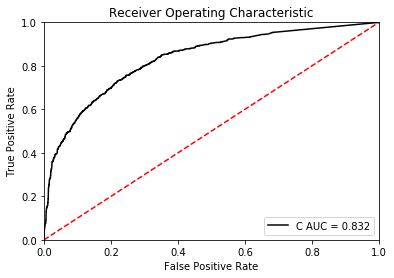

In [164]:
y_true = y_test
y_pred = pred[:,1]

fpr, tpr, threshold = roc_curve(y_true, y_pred)
area_under_curve = auc(fpr, tpr)

# method I: plt
fig, ax = plt.subplots()
plt.title('Receiver Operating Characteristic')
ax.plot(fpr, tpr, 'k', label = 'C AUC = %0.3f' % area_under_curve)

ax.legend(loc = 'lower right')
ax.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [199]:
df_new = pd.read_csv('data/new_olympics_merged.csv', sep = '|',lineterminator='\n')

In [204]:
df_new

Date  last_year  year  condition|snow  condition|trail  \
0     2018-05-06       2017  2018            True             True   
1     2018-05-05       2017  2018           False             True   
2     2018-05-05       2017  2018            True             True   
3     2018-04-25       2017  2018            True             True   
4     2018-04-22       2017  2018           False             True   
5     2018-04-21       2017  2018            True            False   
6     2018-04-21       2017  2018           False            False   
7     2018-04-20       2017  2018            True             True   
8     2018-04-20       2017  2018            True             True   
9     2018-04-19       2017  2018            True             True   
10    2018-04-18       2017  2018            True             True   
11    2018-04-03       2017  2018            True             True   
12    2018-04-01       2017  2018            True            False   
13    2018-03-30       2017  2018            True             True   
14    2018-03-24       2017  2018            True             True   
15    2018-03-18       2017  2018            True             True   
16    2018-03-17       2017  2018            True             True   
17    2018-03-03       2017  2018           False            False   
18    2018-02-24       2017  2018            True             True   
19    2018-02-20       2017  2018            True             True   
20    2018-02-03       2017  2018            True             True   
21    2018-01-20       2017  2018            True            False   
22    2018-01-15       2017  2018            True            False   
23    2018-01-06       2017  2018            True            False   
24    2017-12-12       2016  2017            True             True   
25    2017-11-26       2016  2017           False             True   
26    2017-11-05       2016  2017            True            False   
27    2017-10-29       2016  2017           False            False   
28    2017-09-28       2016  2017           False            False   
29    2017-09-09       2016  2017           False            False   
...          ...        ...   ...             ...              ...   
12338 2012-07-03       2011  2012           False             True   
12339 2012-06-02       2011  2012           False             True   
12340 2012-04-23       2011  2012           False             True   
12341 2012-04-14       2011  2012            True             True   
12342 2011-12-16       2010  2011           False            False   
12343 2011-11-11       2010  2011           False            False   
12344 2011-06-25       2010  2011           False             True   
12345 2011-04-17       2010  2011            True            False   
12346 2010-10-02       2009  2010           False            False   
12347 2010-05-18       2009  2010           False            False   
12348 2010-05-01       2009  2010           False            False   
12349 2010-03-07       2009  2010           False            False   
12350 2010-01-15       2009  2010           False             True   
12351 2009-07-11       2008  2009           False            False   
12352 2009-03-23       2008  2009           False             True   
12353 2008-07-04       2007  2008           False             True   
12354 2005-01-30       2004  2005           False            False   
12355 2005-01-14       2004  2005            True            False   
12356 2004-07-05       2003  2004           False            False   
12357 2004-02-04       2003  2004            True             True   
12358 2003-07-26       2002  2003           False            False   
12359 2003-01-12       2002  2003            True            False   
12360 2002-04-28       2001  2002           False             True   
12361 2001-08-18       2000  2001           False             True   
12362 2001-04-01       2000  2001           False             True   
12363 1999-07-10      

In [201]:
df_new = df_new.drop(['Unnamed: 0','Unnamed: 0_x','Creator','Trail','Report','Votes','_id','last_month','month','Unnamed: 0_y','hike_name','url','super_region','sub_region','monthyear','which_pass'], axis=1)

In [203]:
df_new['Date'] = pd.to_datetime(df_new['Date'])
df_new['month'] = df_new['Date'].apply(lambda x: x.month)

In [179]:
df_new['year'].describe()

count    12368.000000
mean      2012.865864
std          4.960200
min       1997.000000
25%       2011.000000
50%       2015.000000
75%       2016.000000
max       2018.000000
Name: year, dtype: float64

In [232]:
df_new = df_new.fillna(0)

In [233]:
test = df_new[df_new['year'] >= 2016]
train = df_new[df_new['year'] < 2016]

In [192]:
X_test = test.drop(['Date','year','condition|snow', 'condition|trail','condition|bugs','condition|road'], axis = 1)

In [234]:
def get_neighbors(df):
    neigh = KNeighborsClassifier(n_neighbors=20)
    X = df[['highest_point','distance_from_median','month']]
    y = df['condition|snow']
    y = y.astype(bool)
    X_s = normalize(scale(X))
    neigh.fit(X_s,y)
    all_n = neigh.kneighbors()
    averages = []
    for idx_neighbors in all_n[1]:
        neighbors = df_d.iloc[idx_neighbors]
        averages.append(neighbors['condition|snow'].mean())
    df['neighbors_average'] = averages

In [235]:
get_neighbors(test)
get_neighbors(train)

/Users/ashley/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/ashley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [236]:
keys = ['Global_sum_FIPS:53031 FIPS:53009.csv','Global_sum_FIPS:53045 FIPS:53027.csv']
#imports weather and cleans
df_all_weather = get_weather_as_df(keys)
df_weather_clean = clean_weather_df(df_all_weather)
df_weather_distances = df_weather_clean[['LATITUDE','LONGITUDE','name']].drop_duplicates().reset_index()
get_closest_station(train,df_weather_distances)
get_closest_station(test,df_weather_distances)
#merge and save full df
df_test = merge_weather_trails(df_weather_clean,test)
df_train = merge_weather_trails(df_weather_clean,train)

/Users/ashley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ashley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [218]:
df_test

last_year  year  condition|snow  condition|trail  condition|bugs  \
0          2017  2018            True             True           False   
1          2017  2018           False             True           False   
2          2017  2018            True             True           False   
3          2017  2018            True             True           False   
4          2017  2018           False             True           False   
5          2017  2018            True            False           False   
6          2017  2018           False            False           False   
7          2017  2018            True             True           False   
8          2017  2018            True             True           False   
9          2017  2018            True             True           False   
10         2017  2018            True             True           False   
11         2017  2018            True             True           False   
12         2017  2018            True            False           False   
13         2017  2018            True             True           False   
14         2017  2018            True             True           False   
15         2017  2018            True             True           False   
16         2017  2018            True             True           False   
17         2017  2018           False            False           False   
18         2017  2018            True             True           False   
19         2017  2018            True             True           False   
20         2017  2018            True             True           False   
21         2017  2018            True            False           False   
22         2017  2018            True            False           False   
23         2017  2018            True            False           False   
24         2016  2017            True             True           False   
25         2016  2017           False             True           False   
26         2016  2017            True            False           False   
27         2016  2017           False            False           False   
28         2016  2017           False            False           False   
29         2016  2017           False            False           False   
...         ...   ...             ...              ...             ...   
5175       2015  2016           False             True           False   
5176       2015  2016           False             True           False   
5177       2015  2016           False             True           False   
5178       2015  2016           False             True           False   
5179       2015  2016           False             True           False   
5180       2015  2016           False             True           False   
5181       2015  2016           False             True           False   
5182       2015  2016           False             True           False   
5183       2015  2016           False            False           False   
5184       2015  2016           False             True           False   
5185       2015  2016           False             True           False   
5186       2015  2016           False             True           False   
5187       2015  2016           False             True           False   
5188       2015  2016           False             True           False   
5189       2015  2016           False             True           False   
5190       2015  2016           False             True           False   
5191       2015  2016           False             True           False   
5192       2015  2016           False             True           False   
5193       2015  2016           False            False           False   
5194       2015  2016           False            False           False   
5195       2015  2016           False            False           False   
5196       2015  2016           False            False           False   
5197      

In [237]:
test_y = test['condition|snow']
test_x = test.drop(['condition|snow', 'condition|trail','condition|bugs','condition|road','Date','last_year','year','station_distance','closet_station'], axis = 1)
train_y = train['condition|snow']
train_x = train.drop(['condition|snow', 'condition|trail','condition|bugs','condition|road','Date','last_year','year','station_distance','closet_station'], axis = 1)

In [241]:
def make_forest(X_train,y_train,X_test,y_test):
    model = RandomForestClassifier(n_estimators=500)
    fit = model.fit(X_train,y_train)
    pred = model.predict_proba(X_test)
    return model, pred
    

In [242]:
model,pred = make_forest(train_x,train_y,test_x,test_y)

In [243]:
feature_values = {}
for i in range(len(model.feature_importances_)):
   feature_values[all_x.columns[i]] = model.feature_importances_[i]

top_features = sorted(feature_values.items(), key=lambda x: x[1], reverse=True)
top_features

[('distance_from_median', 0.40380697464750298),
 ('neighbors_average', 0.25743363640133859),
 ('elevation_gain', 0.042052977683450378),
 ('Wildlife', 0.033609052448529138),
 ('lat', 0.022343724195601392),
 ('highest_point', 0.021289035159895765),
 ('long', 0.018950582807435189),
 ('number_votes', 0.018134407027495563),
 ('numReports', 0.015608599637675944),
 ('total_distance', 0.015549183056254022),
 ('Wynoochee Pass to Sundown Lake', 0.0076608777318967177),
 ('Old growth', 0.0076132281928415393),
 ('Lakes', 0.0071241264051604735),
 ('Fall foilage', 0.0069777671653856108),
 (' Grand Coulee', 0.0068278765855467978),
 (' Orcas Island', 0.0053915261734896348),
 ('Waterfalls', 0.0052387177781549965),
 ('Wildflowers/Meadows', 0.0046204011320995558),
 ('Ridges/passes', 0.0041056122980121599),
 ('Rivers', 0.0039210451819717013),
 ('Good for kids', 0.0036792396095180562),
 ('Mountain views', 0.0036576601159715861),
 ('None, Northwest Forest Pass', 0.0035957315822187906),
 ('Dogs not allowed', 

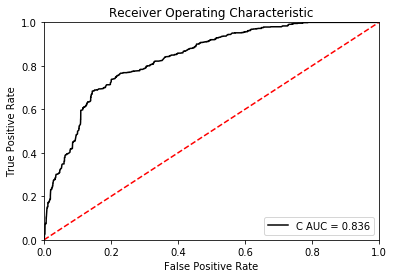

In [245]:
y_true = test_y
y_pred = pred[:,1]

fpr, tpr, threshold = roc_curve(y_true, y_pred)
area_under_curve = auc(fpr, tpr)

# method I: plt
fig, ax = plt.subplots()
plt.title('Receiver Operating Characteristic')
ax.plot(fpr, tpr, 'k', label = 'C AUC = %0.3f' % area_under_curve)

ax.legend(loc = 'lower right')
ax.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()